![](pic/尺度空间_1.png)
### 其中参数 σ控制高斯矩阵内的数值 （控制模糊程度，越大越模糊）

## 多分辨率金字塔
![](pic/尺度空间_2.png)
### 每个分辨率都做多个高斯变换之后的成果（每层都有多个不同模糊程度的图像）

## 高斯差分金字塔（DOG）
![](pic/尺度空间_3.png)
### 通过差分得出区别较大的部分，即我们想要得到的特征值
##### 注：只能作用于同一层的图像，差分减法职能作用在同尺寸的图像中
![](pic/尺度空间_4.png)

## DOG空间极值检测
### 通过差分得到的极值点，拿该点和他周围的k-1个点，上下两层图像的k个点作比较 （k为卷积核的所有点）
##### 注： 因为第一层和最后一层无上下两层图像，因此不能进行空间极值检测
![](pic/尺度空间_5.png)

## 关键点的精确定位
### 候选点（极值点）是离散的点，所以红果对所有离散的点进行拟合得到真实的点
![](pic/6.png)
### 上图是在1维情况表示，但实际的DOG特征点是一个三维的，因此真实公式为：↓
![](pic/7.png)

## 消除边界响应
### Hessian矩阵：
![](pic/8.png)

## 特征点的主方向
### 把当前的极值点转化成一个特征向量
![](pic/9.png)
### 每个特征点可以得到三个信息位置，尺度，方向。


## 生成特征描述
![](pic/10.png)
![](pic/11.png)
![](pic/12.png)
![](pic/13.png)

In [1]:
import cv2
import numpy as np
import matplotlib.pylab as plt

cv2.__version__

'4.6.0'

In [2]:
# opencv 4.2版本以上无法使用 ，opencv已申请专利保护

In [4]:
sift = cv2.xfeatures2d.SIFT_create()

AttributeError: module 'cv2' has no attribute 'xfeatures2d'

In [5]:
# 因为sift专利到期，所以找到了平替orb特征匹配方法
orb = cv2.ORB_create()

# kp1, det1 = orb.

In [14]:
img1 = cv2.imread("./pic/img.png")
img2 = cv2.imread("./pic/img2.png")
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)


bf = cv2.BFMatcher_create(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1,des2)

# 整理排序匹配后的描述符
matches = sorted(matches, key = lambda x:x.distance)
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, flags=2)



In [15]:
cv2.imshow("img",img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

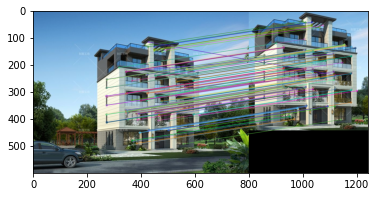

In [20]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
good = []
for m,n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])

img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags=2)
# cv2.imshow("img",img3)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
img3 = cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)
plt.imshow(img3)

## 随机抽样一致算法（RANSAC）
![](pic/14.png)
### 用于排除异常点的干扰
### 选择初始样本点进行拟合 ，给定一个容忍范围，不断进行迭代，每一次拟合后，容忍范围内都有对应的数据点数，找出数据点个数最多的情况就是最终的拟合结果
![](pic/16.png)